1. [Описание проекта](#description)
2. [Открытие данных](#start)
3. [Предобработка данных](#preprocessing)
* [Обработка пропущенных значений](#null)
* [Обработка дубликатов](#duplicates)
4. [Анализ данных](#analysis)
* [Количество объектов общественного питания по видам](#quantity)
* [Количество сетевых и не сетевых заведений](#network)
* [Для какого вида объекта общественного питания характерно сетевое распространение](#cafe)
* [Что характерно для сетевых заведений](#institution)
* [Количество посадочных мест в заведениях различных видов](#places)
* [10 улиц с самым большим количеством объектов общественного питания](#district)
* [Число улиц с одним объектом общественного питания](#street)
* [Распределение количества посадочных мест для улиц с большим количеством заведений](#distribution)
5. [Вывод](#conclusion)
6. [Презентация](#presentation)

# Рынок общественного питания Москвы

<a id="description"></a>

Необходимо подготовить исследование рынка общественного питания в Москве. Запилить призентацию для инвесторов, с целью получить средства на открытие небольшое кафе в Москве, в котором работать будут роботы-официант. Инвесторов интересует текущее положение дел на рынке — сможет ли кафе снискать популярность на долгое время.

**Описание данных**

Таблица rest_data:
* id — идентификатор объекта;
* object_name — название объекта общественного питания;
* chain — сетевой ресторан;
* object_type — тип объекта общественного питания;
* address — адрес;
* number — количество посадочных мест.

**План работы**

* Изучим полученые данные.
* Заполним пропуски в данных. 
* Удалим дубликаты и данные, которые менее информативны и мешают для проведения расчетов. 
* Приведем данные к необxодимому виду для анализа.
* Проанализуруем текущее положение дел на рынке общепита.
* Выясним какие объекты общепита преобладают на рынке.
* Подготовим презентацию с рекомендациями.

<a id="start"></a>
## Шаг №1. Загрузим данные

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
from numpy import median
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# загружаем данные
rest_data = pd.read_csv('rest_data.csv')
rest_data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [3]:
# изучим информацию о датасете
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


## Шаг №2 Предобработка данных <a id="preprocessing"></a>

#### Обработка пропущенных значений  <a id="null"></a>

In [4]:
# проверим на пропуски
round((rest_data.isna().mean()*100),2)

id             0.0
object_name    0.0
chain          0.0
object_type    0.0
address        0.0
number         0.0
dtype: float64

#### Обработка дубликатов  <a id="duplicates"></a>

In [5]:
# проверим на дубликаты
rest_data.duplicated().sum()

0

Явные дубликаты не обнаружены. Проведем проверку на поиск дубликатов без столбца с уникальным номером объекта `id`.

In [6]:
# дубликаты без столбца id

rest_dupl = rest_data.drop('id', axis=1)
rest_dupl.duplicated().sum()

82

Получили 82 дубликата

In [7]:
# количество уникальных названий ресторанов
len(rest_data['object_name'].unique())

10393

In [8]:
#список уникальных названий ресторанов и количество их упоминаний
rest_data['object_name'].value_counts()

Столовая                   267
Кафе                       236
Шаурма                     234
KFC                        155
Шоколадница                142
                          ... 
Столовая ТЦ «Энтузиаст»      1
Охунова У.Д.                 1
СОК ООО АВТОКОМБИНАТ 3       1
АВТОКОМБИНАТ 3               1
Кальянная «Мята Lounge»      1
Name: object_name, Length: 10393, dtype: int64

In [9]:
# список уникальных типов объектов общественного питания
rest_data['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

In [10]:
# укоротим названия типов объектов питания
rest_data['object_type'] = (
    rest_data['object_type'].replace('предприятие быстрого обслуживания', 'фастфуд')
)    
rest_data['object_type'] = (
    rest_data['object_type'].replace('магазин (отдел кулинарии)', 'кулинария')
) 

In [11]:
# приведем названия заведений к нижнему регистру букв
rest_data['object_name'] = rest_data['object_name'].str.lower()

In [12]:
# еще раз посмотрим на дубликаты
rest_dupl = rest_data.drop('id', axis=1)
rest_dupl.duplicated().sum()

85

После обработки названий заведений число дубликатов стало 85. Это количество не большое, удалим их из датасета.

In [13]:
# удалим дубликаты с помощью фун. drop_duplicates, и зададим ей список столбцов, в которых надо искать дубликаты
rest_data = rest_data.drop_duplicates(subset=[
    'object_name', 
    'chain', 
    'object_type', 
    'address', 
    'number'])

Проведем анализ числового столбца `number` на аномальность

In [14]:
# статестические данные столбца `number`
rest_data['number'].describe()

count    15281.000000
mean        59.788234
std         74.843042
min          0.000000
25%         14.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: number, dtype: float64

In [15]:
# просмотрим на ресторан с таким количеством посадочных мест
rest_data[rest_data['number'] == 1700]

,id,object_name,chain,object_type,address,number
12723,199696,arena by soho family,нет,бар,"город Москва, Кутузовский проспект, дом 36, ст...",1700


Мин. значение 0 посадочных мест - скорее всего это те заведения, которые торгуют на вынос. Отрицательных значений нет, это хорошо, это была бы явная ошибка в данных. Мах. значение 1700 посадочных мест, это много, но и заведение `arena by soho family	`, которое предоставляет такое количество, реально существует и соотвествует этим значениям. </div>

**Итог** Данные загружены, предобработка проведена, все корректировки сделаны. Неявные дубликаты удалены, названия заведений приведены к нижнему регистру, в числовых данных анномалий нет, можно перейти к анализу.

<a id="analysis"></a>
## Шаг №3. Анализ данных

### Исследуем соотношение видов объектов общественного питания по количеству. Построим график.<a id="quantity"></a>

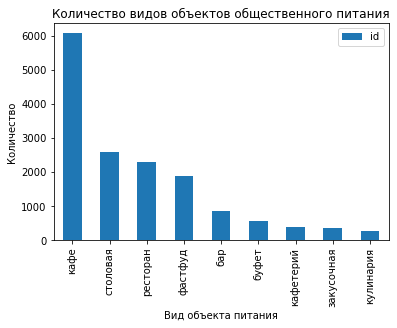

In [16]:
# график количества объектов общепита 
rest_data.pivot_table(
    index='object_type', 
    values='id', 
    aggfunc='count'
).sort_values(by='id', ascending=False).plot(kind='bar')
plt.title('Количество видов объектов общественного питания')
plt.xlabel('Вид объекта питания')
plt.ylabel('Количество')
plt.show()

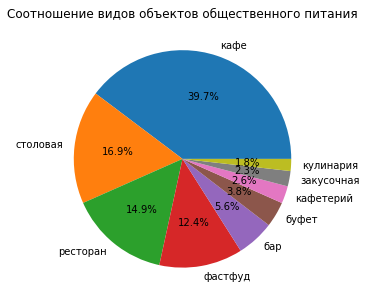

In [17]:
# график занимаемой доли рынка каждым объектом общепита
rest_type = rest_data.pivot_table(
    index='object_type', 
    values='id', 
    aggfunc='count'
).sort_values(by='id', ascending=False)
rest_type['percent'] = rest_type['id'] / rest_type['id'].sum() * 100
rest_type.plot(y='percent',kind='pie', figsize=(5, 5), autopct='%1.1f%%', legend=False)
plt.ylabel('')
#plt.legend(loc=(1.3, 0.5))
plt.title('Соотношение видов объектов общественного питания')
plt.show()

**Вывод** По графику видно, что значительную долю рынка занимают кафе

### Исследуем соотношение сетевых и несетевых заведений по количеству. Построим график. <a id="network"></a>

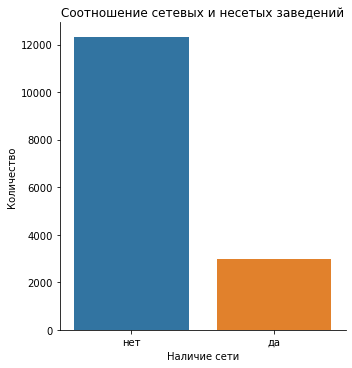

In [18]:
# соотношение сетевых и несетых заведений
sns.catplot(x='chain', kind='count', data=rest_data)
plt.title('Соотношение сетевых и несетых заведений')
plt.xlabel('Наличие сети')
plt.ylabel('Количество')
plt.show()

**Вывод**
Несетевые заведения преобладают в городе.

### Выясним для какого вида объекта общественного питания характерно сетевое распространение?<a id="cafe"></a>

In [19]:
# посчитаем процент сетевых заведений для каждого вида объекта общественного питания
rest_chain = rest_data.pivot_table(
    index='object_type', 
    columns='chain', 
    values='id', 
    aggfunc='count').reset_index()
rest_chain['total'] = rest_chain['да'] + rest_chain['нет']
rest_chain['percent'] = rest_chain['да'] / rest_chain['total'] * 100


<Figure size 576x1440 with 0 Axes>

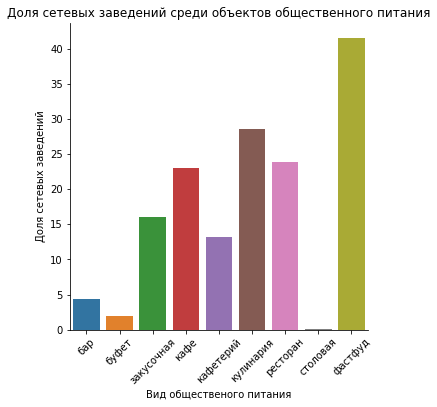

In [20]:
# график "доля сетевых заведений среди объектов общественного питания"
plt.figure(figsize=(8,20))
sns.catplot(x="object_type", y="percent", kind="bar", data=rest_chain)
plt.title('Доля сетевых заведений среди объектов общественного питания')
plt.xlabel('Вид общественого питания')
plt.ylabel('Доля сетевых заведений')
plt.xticks(rotation = 45)
plt.show()

**Вывод** На первом месте заведения быстрого питания, для них больше всего характерно сетевое распространение, следом идет кулинария, рестораны и кафе.

### Определим что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?<a id="institution"></a>

In [21]:
# оставим только сетевые заведения
rest_chain = rest_data[rest_data['chain'] == 'да']

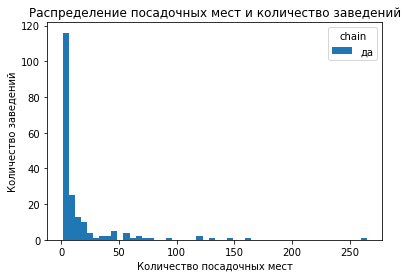

In [22]:
# график "распределение посадочных мест и количество заведений"
rest_chain.pivot_table(
    index='number', 
    columns='chain', 
    values='id', 
    aggfunc='count').plot(kind='hist', bins=50)
plt.title('Распределение посадочных мест и количество заведений')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Количество заведений')
plt.show()

C:\Users\radis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


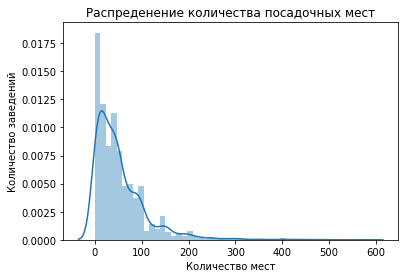

In [23]:
# график распределения и линейный график
ax = sns.distplot(rest_chain['number']) 
ax.axes.set_title('Распреденение количества посадочных мест')
ax.set_xlabel('Количество мест')
ax.set_ylabel('Количество заведений')
plt.show()

**Вывод** для сетевых заведений характерно много заведений с небольшим числом посадочных мест в каждом.

### Для каждого вида объекта общественного питания опишим среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Построим графики.<a id="places"></a>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'кафе'),
  Text(1, 0, 'столовая'),
  Text(2, 0, 'закусочная'),
  Text(3, 0, 'фастфуд'),
  Text(4, 0, 'ресторан'),
  Text(5, 0, 'кафетерий'),
  Text(6, 0, 'буфет'),
  Text(7, 0, 'бар'),
  Text(8, 0, 'кулинария')])

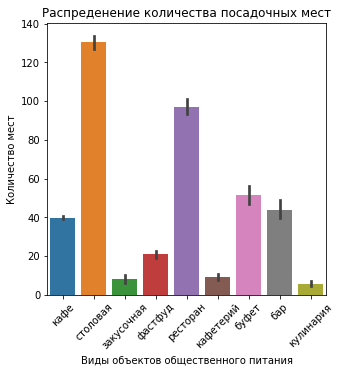

In [24]:
plt.figure(figsize=(5, 5))

ax = sns.barplot(x='object_type', y='number', data=rest_data)
ax.axes.set_title('Распреденение количества посадочных мест')
ax.set_xlabel('Виды объектов общественного питания')
ax.set_ylabel('Количество мест')
plt.xticks(rotation = 45)

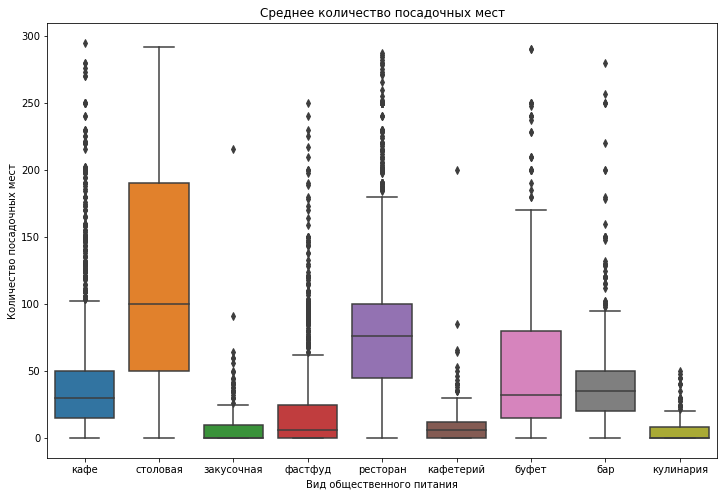

In [25]:
plt.figure(figsize=(12, 8))

rest_data_number = rest_data[rest_data['number'] < 300]
sns.boxplot(x='object_type', y='number', data=rest_data_number) 
plt.title('Среднее количество посадочных мест')
plt.xlabel('Вид общественного питания')
plt.ylabel('Количество посадочных мест')
plt.show()

**Вывод** Самое большое количество посадочных мест предоставляют столовые.

Выделим в отдельный столбец информацию об улице из столбца `address`

In [26]:
# новый столбец с названием улицы
rest_data['street'] = rest_data['address'].str.split(', ', expand=True)[1]

### Построим график топ-10 улиц по количеству объектов общественного питания. Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы?<a id="district"></a>

In [27]:
# импортирование файла с внешней информацией
from io import BytesIO
import requests
spreadsheet_id = '1ZCSvPmSnYmH7YZIduf2nDnn468MNXZBZgK1iuKGoGHM'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))
df.head(3)

,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,...,AdmArea_en,District_en,Address_en,PublicPhone_en,SeatsCount_en,SocialPrivileges_en,Longitude_WGS84_en,Latitude_WGS84_en,geodata_center,geoarea
0,Код,Наименование,global_id,Является сетевым,Название управляющей компании,Вид объекта,Административный округ по адресу,Район,Адрес,Контактный телефон,...,AdmArea_en,District_en,Address_en,PublicPhone_en,SeatsCount_en,SocialPrivileges_en,Longitude_WGS84_en,Latitude_WGS84_en,geodata_center,geoarea
1,00151635,СМЕТАНА,637376221,нет,NaN,кафе,Северо-Восточный административный округ,Ярославский район,"город Москва, улица Егора Абакумова, дом 9",PublicPhone:(499) 183-14-10\n\n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""coordinates"":[37.714565000436,55.87900153130...",NaN
2,000077874,Родник,637376331,нет,NaN,кафе,Центральный административный округ,Таганский район,"город Москва, улица Талалихина, дом 2/1, корпус 1",PublicPhone:(495) 676-55-35\n\n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""coordinates"":[37.6733061300344,55.7382386551...",NaN


In [28]:
#выделим из адреса только улицу
df['street'] = df['Address'].str.split(', ', expand=True)[1]

In [29]:
# создадим новый датасет с двумя столбцами улица и округ
district = df[['street', 'District']]
district = district.rename(columns={'District': 'district'})

In [30]:
# добавим столбец округ из таблицы с сайта
rest_data_district = rest_data.merge(district, on='street', how='left')
rest_data_district = rest_data_district.drop_duplicates()
rest_data_district.head()

,id,object_name,chain,object_type,address,number,street,district
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,Ярославский район
3,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,Таганский район
11,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,Нижегородский район
12,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица,Таганский район
14,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица,район Лианозово


In [31]:
# посчитаем количество объектов общепитов и количество посадочных мест на улицах
streets = (
    rest_data_district.groupby(['street', 'district'])
    .agg({'id':'count',
         'number':'sum'})
    .rename(columns={'id': 'count'})
    .reset_index()
    .sort_values(by='count', ascending=False)
)    
streets

,street,district,count,number
1400,город Зеленоград,район Матушкино,232,17050
1399,город Зеленоград,район Крюково,232,17050
1403,город Зеленоград,район Старое Крюково,232,17050
1402,город Зеленоград,район Силино,232,17050
1401,город Зеленоград,район Савёлки,232,17050
...,...,...,...,...
837,Нагорный бульвар,район Котловка,1,40
1638,улица Генерала Ермолова,район Дорогомилово,1,60
839,Напрудный переулок,Мещанский район,1,30
840,Нарвская улица,Войковский район,1,45


In [32]:
# построим график распределения объектов общепита на 10 самых крупных улицах Москвы

streets_10 = (
    rest_data.groupby('street')
    .agg({'id':'count',
         'number':'sum'})
    .rename(columns={'id': 'count'})
    .reset_index()
    .sort_values(by='count', ascending=False)
)    

In [33]:
# исключаем попавшие в писок города
streets_10 = streets_10.query('street != "город Зеленоград" & street != "поселение Сосенское"')

In [34]:
# оставляем первые 10 улиц
streets_10 = streets_10.head(10)

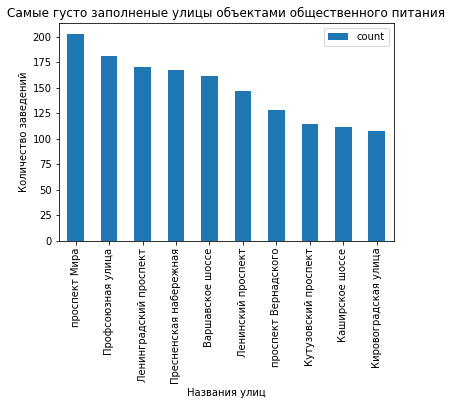

In [35]:
# визуализируем результат
streets_10.plot(kind='bar', x='street', y='count')
plt.title('Самые густо заполненые улицы объектами общественного питания')
plt.xlabel('Названия улиц')
plt.ylabel('Количество заведений')
plt.show()

In [36]:
# добавям к названиям улиц округа
streets_10_d = streets_10.merge(district, on='street', how='left')
streets_10_d

,street,count,number,district
0,проспект Мира,203,12790,Мещанский район
1,проспект Мира,203,12790,Мещанский район
2,проспект Мира,203,12790,Мещанский район
3,проспект Мира,203,12790,Мещанский район
4,проспект Мира,203,12790,Мещанский район
...,...,...,...,...
1511,Кировоградская улица,108,6457,район Чертаново Центральное
1512,Кировоградская улица,108,6457,район Чертаново Центральное
1513,Кировоградская улица,108,6457,район Чертаново Центральное
1514,Кировоградская улица,108,6457,район Чертаново Центральное


**Вывод** Улица с самым большим количеством объектов общепита проспект Мира, это одна из центральных улиц города, самая протященная.

### Найдем число улиц с одним объектом общественного питания. Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы? <a id="street"></a>

In [37]:
# сгруппируем таблицу по улицам и посчитаем количество заведений на них
streetss = (
    rest_data.groupby('street')
    .agg({'id':'count'})
    .rename(columns={'id': 'count'})
    .reset_index()
    .sort_values(by='count')
)    
# оставим только те улицу, на которых размещено одно заведение общепита
streetss = streetss[streetss['count'] == 1]
len(streetss['street'])

579

In [38]:
# добавим к таблице данные об округах
streetss_d = streetss.merge(district, on='street', how='left')
streetss_d

,street,count,district
0,улица Недорубова,1,NaN
1,Театральная аллея,1,район Аэропорт
2,Таёжная улица,1,Лосиноостровский район
3,Газгольдерная улица,1,Нижегородский район
4,Тарханская улица,1,район Выхино-Жулебино
...,...,...,...
730,улица Академика Семёнова,1,район Южное Бутово
731,улица Алексея Дикого,1,район Новогиреево
732,5-й проезд Марьиной Рощи,1,NaN
733,65-й километр Московской Кольцевой Автодороги,1,район Строгино


**Вывод** Улиц с одним объектом общественного питания 579, это улицы окраин.

### Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. <a id="distribution"></a>

Text(0.5, 1.05, 'Распределение посадочных мест на улицах в большим количеством заведений')

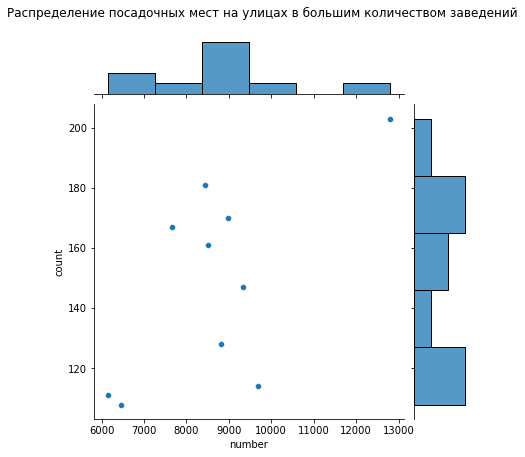

In [39]:
# график распределения посадочных мест на улицах с большим количеством объектов общепита
ax = sns.jointplot(x='number', y='count', data=streets_10) 
ax.fig.suptitle('Распределение посадочных мест на улицах в большим количеством заведений', y=1.05)

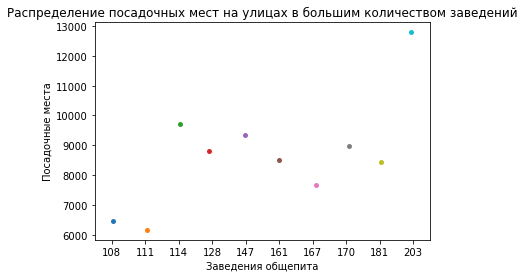

In [40]:
sns.stripplot(x='count', y='number', data=streets_10) 
plt.title('Распределение посадочных мест на улицах в большим количеством заведений')
plt.xlabel('Заведения общепита')
plt.ylabel('Посадочные места')
plt.show()

**Вывод** Для самых крупных улиц с наибольшим количеством заведений характерно предоставление посадочных мест около 8000-10000.

<AxesSubplot:>

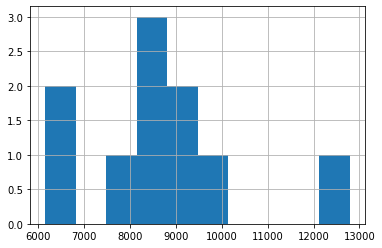

In [41]:
streets_10['number'].hist()

Чаще всего улицы предоставляют 9000 посадочных мест.

<a id="conclusion"></a>
## Шаг №4. Выводы

Рынок общественного питания города Москва очень насыщенный и конкурирующий, есть большой выбор видов объектов для различных целей и аудитории. Самый насыщенный по количеству заведений - это районы прилежащие к центру. 

Для нового стартапа покекомендую выбрать вид объекта общественного питания - кафе, это самый популярный вид в городе Москва. Количество посадочных мест не самое большое, расположение должно быть в на улицах с большим покопом людей, но не в самом центре, там большая конкуренция. Думаю, развитие сети для такого новаторского объекта будет приемлемым и перспективным.


<a id="presentation"></a>
## Шаг №5. Презентация результатов анализа

Презентация: <https://disk.yandex.ru/i/I7XVDT1HrD-oWQ>